1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

In [198]:
# Data analysis
# Todo: analyze your data here

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [200]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [201]:
df.describe(include='all')

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN
freq,NaN,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN
mean,993.000000,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323
std,573.741812,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332
min,0.000000,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000
25%,496.500000,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000
50%,993.000000,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000
75%,1489.500000,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000


<Axes: xlabel='Age', ylabel='Count'>

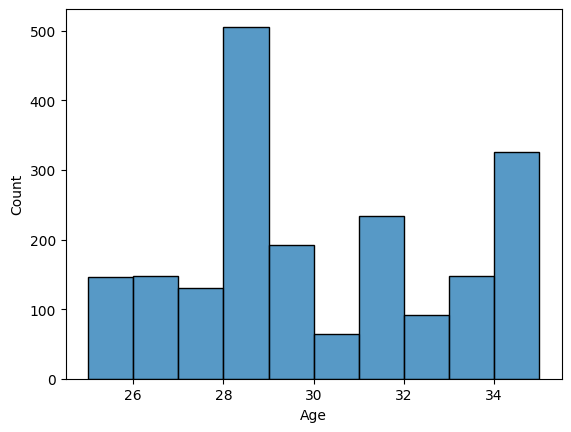

In [202]:
sns.histplot(x=df.Age,bins=10)

In [203]:
df.groupby('TravelInsurance').size()

TravelInsurance
0    1277
1     710
dtype: int64

## Preprocessing

In [204]:
def preprocessing_data(df):
    # Todo: preprocess data
    df = df.drop('Unnamed: 0',axis=1)
    df = df.dropna()
    return df

In [205]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [206]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<Axes: >

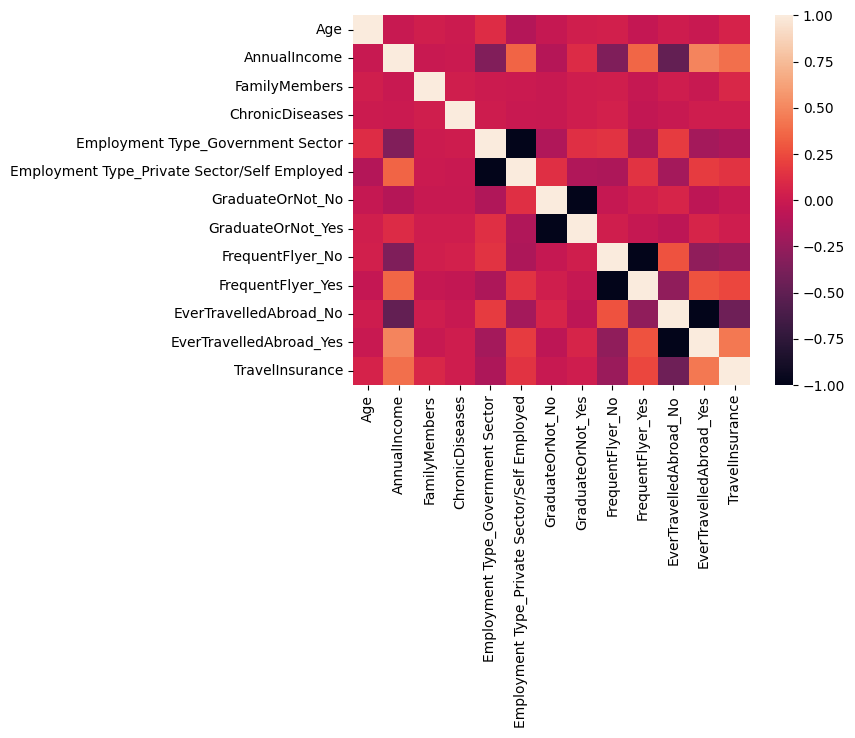

In [207]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def apply_feature_engineering(df):
    # Todo: Normalize your data
    numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['TravelInsurance']))]
    categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'object'))]
    df_cat_scaled=pd.get_dummies(df[categorical_features],columns=categorical_features).astype('int')
    df=pd.concat([df[numerical_features],df_cat_scaled,df['TravelInsurance']],axis=1)
    scaler=StandardScaler()
    df[numerical_features]=scaler.fit_transform(df[numerical_features])
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [208]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    X = df.drop('TravelInsurance',axis=1)
    y = df.TravelInsurance
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [209]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [210]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    scaler=StandardScaler()
    nb=GaussianNB()
    model = make_pipeline(scaler,nb)
    model.fit(X,y)
    return model

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-score: {:.2f}".format(f1))

    # Todo: Only choose one of them as your score for the question 7
    main_score = accuracy
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(y_true=testY,y_pred=pred)

Accuracy: 0.71
Precision: 0.65
Recall: 0.51
F1-score: 0.57


0.7135678391959799

In [211]:
from sklearn.model_selection import GridSearchCV
def build_model_V2(X, y):
    scaler=StandardScaler()
    nb=GaussianNB()
    model = make_pipeline(scaler,nb)
    param_grid = {
        'gaussiannb__var_smoothing': [1e-11, 1e-10, 1e-9]
    }
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid_search.fit(X, y)
    best_model=grid_search.best_estimator_
    return best_model

model_v2=build_model_V2(trainX,trainY)
pred_v2=model_v2.predict(testX)
calculate_performance(testY,pred_v2)

Accuracy: 0.71
Precision: 0.65
Recall: 0.51
F1-score: 0.57


0.7135678391959799

In [212]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: "

Sau khi xây dựng mô hình thì độ chính xác của mô hình chỉ đạt được 71%, chỉ số này không cao. Em nghĩ trong lúc xây dựng model thì có thể tối ưu được việc chuẩn hóa dữ liệu để có thể fit được mô hình trên, hoặc có thể chọn lọc dữ liệu để có thể tăng được độ chính xác.